# CREDIT DATA SET

### we are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several Independent Variables like, checking account balance, Credit History, Purpose, Loan amount etc. 

#### Import Required Libraries and Packages.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from sklearn import tree
from os import system

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Importing and loading data set

In [3]:
cd = pd.read_csv("credit.csv")
cd

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
cd.shape

(1000, 17)

#### our data set contains 1000 rows and 17 columns

In [5]:
cd.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
cd.dtypes  # Describes data type of every column.

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [7]:
cd.describe()  # Describes Stats of all the Numerical Columns.

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

#### Out of 17 columns, 7 are Numeric(int) and 10 are categorical. Also, From here we can see that none of the column is having missing values.

### Lets convert the columns with an "object" data type into the categorical variables.

In [9]:
for feature in cd.columns:
    if cd[feature].dtype == 'object':
        cd[feature] = pd.Categorical(cd[feature])
cd.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [10]:
cd.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [11]:
print(cd.checking_balance.value_counts())
print(cd.credit_history.value_counts())
print(cd.purpose.value_counts())
print(cd.savings_balance.value_counts())
print(cd.employment_duration.value_counts())
print(cd.other_credit.value_counts())
print(cd.housing.value_counts())
print(cd.job.value_counts())
print(cd.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


## Label Encoding and One Hot Encoding

#### Label Encoding is used when we have a  Criteria, Order or Range.

In [12]:
### LABEL ENCODING
cd = cd.replace({
    "checking_balance" : {"< 0 DM":1, "1 - 200 DM":2, "> 200 DM":3,"unknown":-1},
    "credit_history" : {"critical":1, "poor":2, "good":3, "very good":4, "perfect":5},
    "savings_balance" : {"< 100 DM":1, "100 - 500 DM":2, "500 - 1000 DM":3, "> 1000 DM":4, "unknown":-1},
    "employment_duration":{"unemployed":1, "< 1 year":2, "1 - 4 years":3, "4 - 7 years":4, "> 7 years":5},
    "phone" : {"no":1, "yes":2},
    "job" : {"unemployed":1, "unskilled":2, "skilled":3, "management":4},
    "default" : {"no" :0, "yes":1}
})

 ### ONE HOT ENCODING   
onehotcols = ["purpose", "housing", "other_credit", "job"]
cd = pd.get_dummies(cd, columns = onehotcols)
cd.head(10)
    





,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_1,job_2,job_3,job_4
0,1,6,1,1169,-1,5,4,4,67,2,1,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,2,48,3,5951,1,3,2,2,22,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,-1,12,1,2096,1,4,2,3,49,1,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,1,42,3,7882,1,4,2,4,45,1,2,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
4,1,24,2,4870,1,3,3,4,53,2,2,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5,-1,36,3,9055,-1,3,2,4,35,1,2,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
6,-1,24,3,2835,3,5,3,4,53,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
7,2,36,3,6948,1,3,2,2,35,1,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8,-1,12,3,3059,4,4,2,4,61,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
9,2,30,1,5234,1,1,4,2,28,2,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [13]:
cd.shape

(1000, 29)

In [14]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

## Split Data

In [15]:
x = cd.drop("default", axis = 1)
y = cd.pop("default")

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

## Build Decision Tree Model
### We will build  our model using the DecisionTreeClassifier function, Using default 'gini criteria to split. Other option include Entropy.

In [17]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [18]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.68


## Visualizing the Decision Tree


In [19]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot', 'w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [20]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


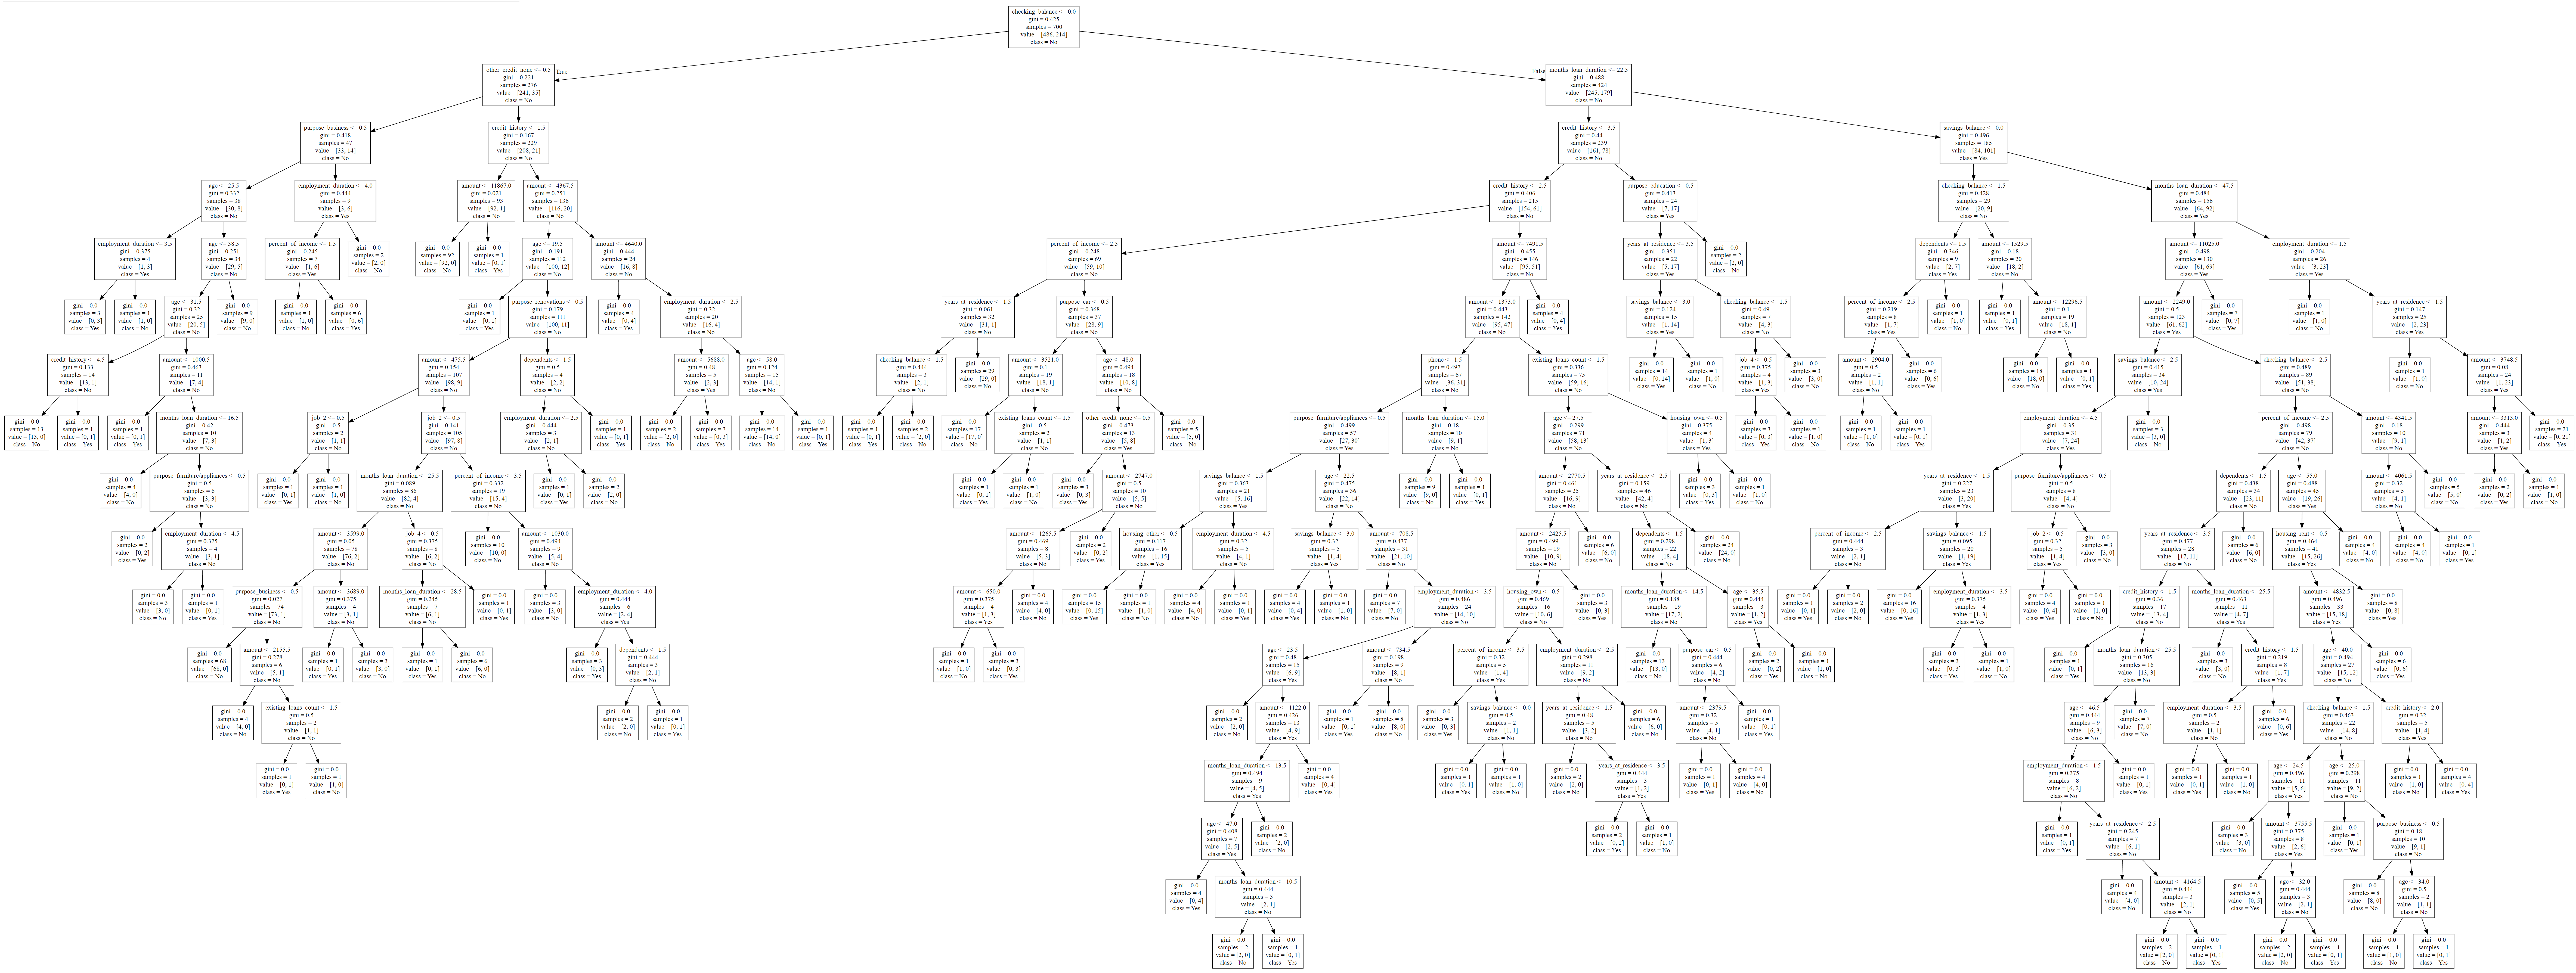

# Reducing Overfitting(Regularization)

In [21]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,random_state = 1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.7528571428571429
0.7433333333333333


In [22]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot', 'w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(x_train),class_names = list(train_char_label))
Credit_Tree_FileR.close()

In [23]:
retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode > 0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

system command returning error: 1


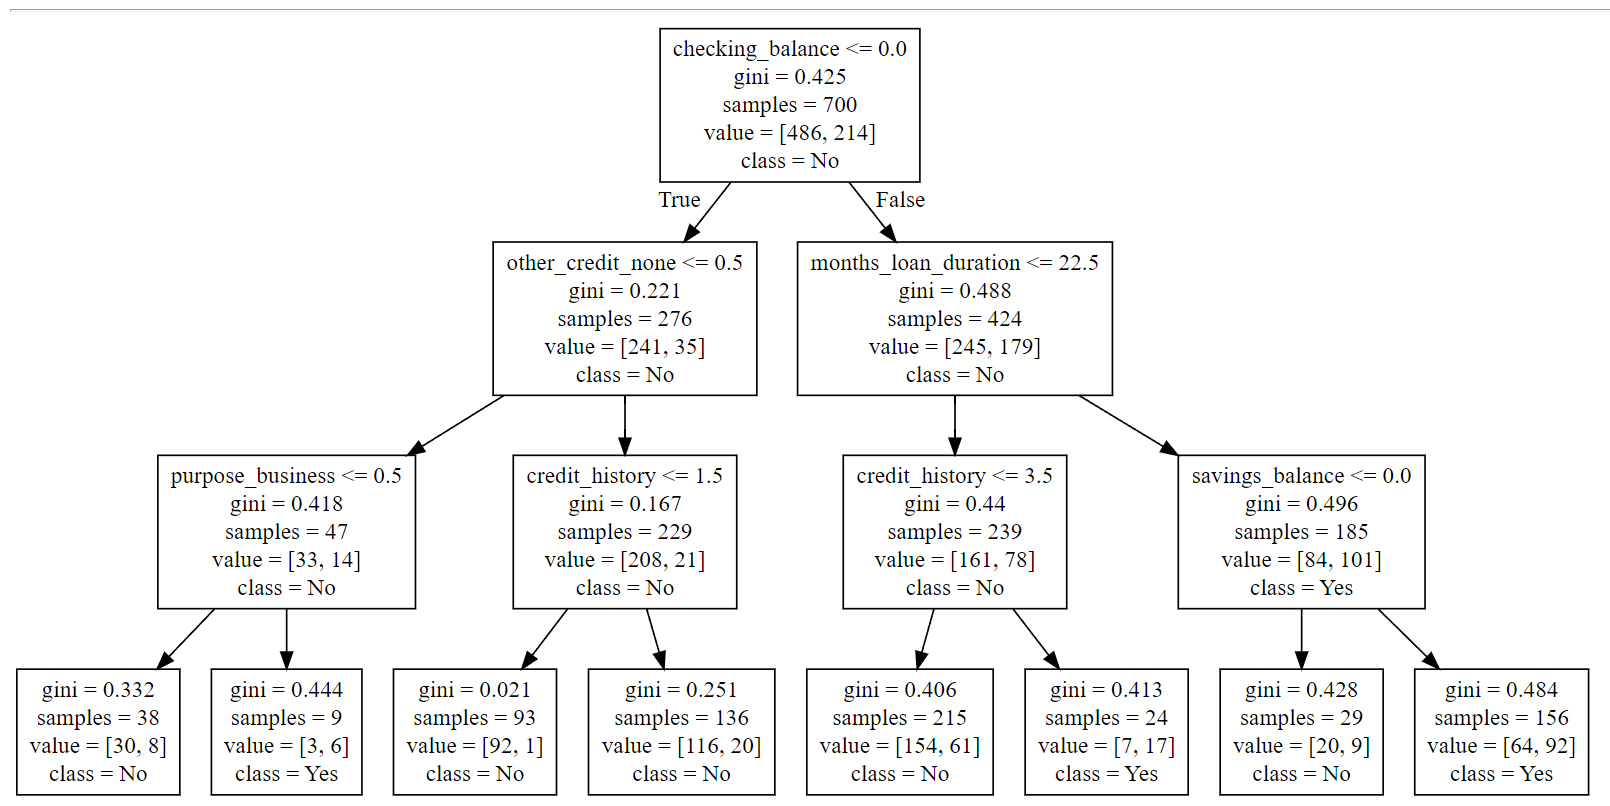

### Importance of Features in Tree Building

In [24]:
print(pd.DataFrame(dTreeR.feature_importances_,columns = ["Imp"], index = x_train.columns))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
amount                        0.000000
savings_balance               0.064467
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.051129
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.000000
other_credit_none             0.055977
other_credit_store            0.000000
job_1                    

0.7433333333333333


<AxesSubplot:>

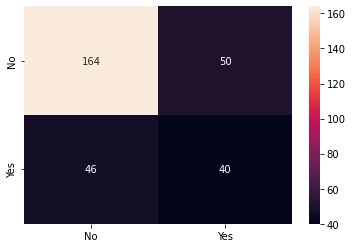

In [25]:
print(dTreeR.score(x_test, y_test))
y_predict = dTree.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]], columns = [i for i in ["No", "Yes"]])
sns.heatmap(df_cm, annot=True, fmt='g')

# Ensemble Learning - Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=40, base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_train, y_train))
print(bgcl.score(x_test, y_test))

1.0
0.7633333333333333


In [27]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=40, base_estimator=dTreeR,random_state=1)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_train, y_train))
print(bgcl.score(x_test, y_test))

0.7757142857142857
0.7366666666666667


<AxesSubplot:>

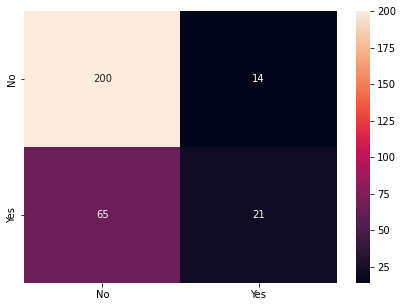

In [28]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')

# Ensemble Learning - AdaBoosting

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=15, random_state=1)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_train, y_train))
print(abcl.score(x_test, y_test))

0.7885714285714286
0.7466666666666667


<AxesSubplot:>

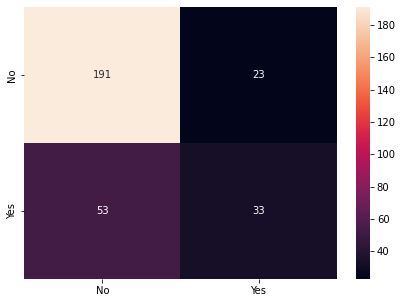

In [30]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Ensemble Learning - GradientBoost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 15, max_depth=3, random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predit = gbcl.predict(x_test)
print(gbcl.score(x_train, y_train))
print(gbcl.score(x_test, y_test))

0.7757142857142857
0.73


<AxesSubplot:>

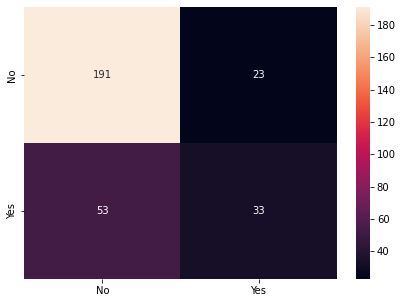

In [32]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Ensemble RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=20,max_features=7,max_leaf_nodes=8,random_state=1)
rfcl = rfcl.fit(x_train,y_train)
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.7614285714285715
0.7333333333333333


<AxesSubplot:>

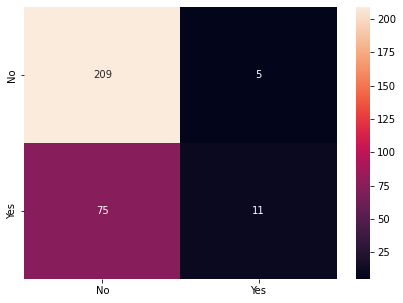

In [34]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# XGBOOST CLASSIFIER

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators = 6, max_depth = 3, max_leaves = 8,  random_state=1)
xgbcl = xgbcl.fit(x_train, y_train)
y_predict = xgbcl.predict(x_test)
print(xgbcl.score(x_train, y_train))
print(xgbcl.score(x_test, y_test))

0.7857142857142857
0.7366666666666667
